In [6]:
# loading the data from the Excel file into a Pandas DataFrame
import pandas as pd
file_path = "D:\Python lms\Python_Project\Ecommerce_Dashboard.xlsx"
df = pd.read_excel(file_path)
print(df)

            Order ID Order Date  Ship Date  Aging       Ship Mode   
0          AU-2015-1 2015-11-09 2015-11-17      8     First Class  \
1          AU-2015-2 2015-06-30 2015-07-02      2     First Class   
2          AU-2015-3 2015-12-05 2015-12-13      8     First Class   
3          AU-2015-4 2015-05-09 2015-05-16      7     First Class   
4          AU-2015-5 2015-07-09 2015-07-18      9     First Class   
...              ...        ...        ...    ...             ...   
51285  FA-2015-30771 2015-01-21 2015-01-27      6  Standard Class   
51286  FA-2015-30772 2015-06-22 2015-06-24      2  Standard Class   
51287  FA-2015-30773 2015-01-01 2015-01-07      6  Standard Class   
51288  FA-2015-30774 2015-12-07 2015-12-14      7  Standard Class   
51289  FA-2015-30775 2015-12-01 2015-12-06      5  Standard Class   

         Product Category            Product  Sales  Quantity  Discount  ...   
0      Auto & Accessories  Car Media Players    140         2      0.05  ...  \
1      Auto

In [7]:
#Task 1 Calculate Create a histogram to analyse a number of shipping days.
#dates of order placement and shipping column should be there 
# Assuming you have columns 'order_date' and 'ship_date'
# Convert them to datetime if they are not already
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Calculate the number of shipping days
df['shipping_days'] = (df['Ship Date'] - df['Order Date']).dt.days
print(df['shipping_days'])


0        8
1        2
2        8
3        7
4        9
        ..
51285    6
51286    2
51287    6
51288    7
51289    5
Name: shipping_days, Length: 51290, dtype: int64


In [10]:
df['shipping_days'].value_counts()

shipping_days
3     5017
5     4939
7     4900
6     4892
10    4891
4     4875
8     4820
2     4815
1     4766
9     4674
0     2701
Name: count, dtype: int64

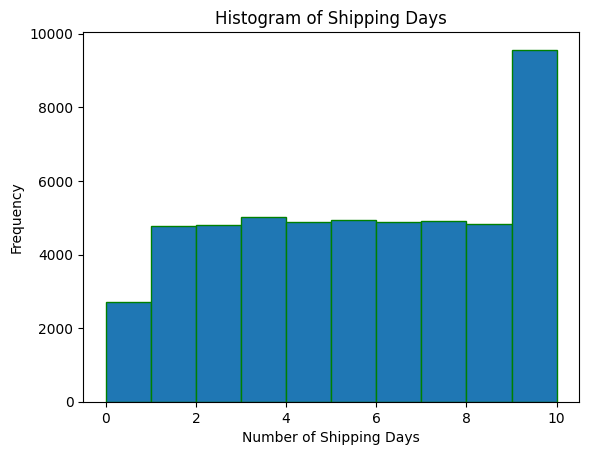

In [12]:
#create a histogram to analyze the number of shipping days.
import matplotlib.pyplot as plt

# Plotting the histogram
plt.hist(df['shipping_days'], bins=10, edgecolor='green') # You can adjust the number of bins #bins represent segmentation
plt.title('Histogram of Shipping Days')
plt.xlabel('Number of Shipping Days')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# also need to install pip install xlsxwriter
# Task 4
#Prepare a table of Sales and Profit month-wise in one sheet, named it as ‘WorkingSheet
import pandas as pd

# Define the path to the source Excel file and the target Excel file
source_file_path = "D:\Python lms\Python_Project\Ecommerce_Dashboard.xlsx"
target_file_path = "D:\Python lms\Python_Project\WorkingSheet.xlsx"

# Load the Excel file
df = pd.read_excel(source_file_path)

# Ensure 'Order Date' is in datetime format and create a new column for the month
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.strftime('%Y-%m')  # This creates a 'Month' column in 'YYYY-MM' format for easier sorting

# Group by the 'Month' column and sum up the 'Sales' and 'Profit'
monthly_sales_profit = df.groupby('Month').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Sort by 'Month' to ensure chronological order
monthly_sales_profit.sort_values('Month', inplace=True)

# Save the grouped data into the 'WorkingSheet' sheet of the target Excel file
with pd.ExcelWriter(target_file_path, engine='xlsxwriter') as writer:
    monthly_sales_profit.to_excel(writer, sheet_name='WorkingSheet', index=False)

print(f"The file has been saved to {target_file_path}")


In [2]:
#Task 5
# Prepare the sales table region-wise in the working sheet
#note if u want to create new sheet in working make sure it should not be in work or open
import pandas as pd

# Path to the source Excel file and the target Excel file on your local machine
source_file_path = "D:\\Python lms\\Python_Project\\Ecommerce_Dashboard.xlsx"
target_file_path = "D:\\Python lms\\Python_Project\\WorkingSheet.xlsx"

# Load the source Excel file
df = pd.read_excel(source_file_path)

# Group by the 'Region' column and sum up the 'Sales'
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

# Load the target Excel file, append a new sheet with region-wise sales data
with pd.ExcelWriter(target_file_path, engine='openpyxl', mode='a') as writer:
    # If 'RegionSales' sheet already exists it will be replaced
    if 'RegionSales' in writer.book.sheetnames:
        idx = writer.book.sheetnames.index('RegionSales')
        writer.book.remove(writer.book.worksheets[idx])
    region_sales.to_excel(writer, sheet_name='RegionSales', index=False)

print("Region-wise sales data has been added to 'WorkingSheet.xlsx'")


Region-wise sales data has been added to 'WorkingSheet.xlsx'


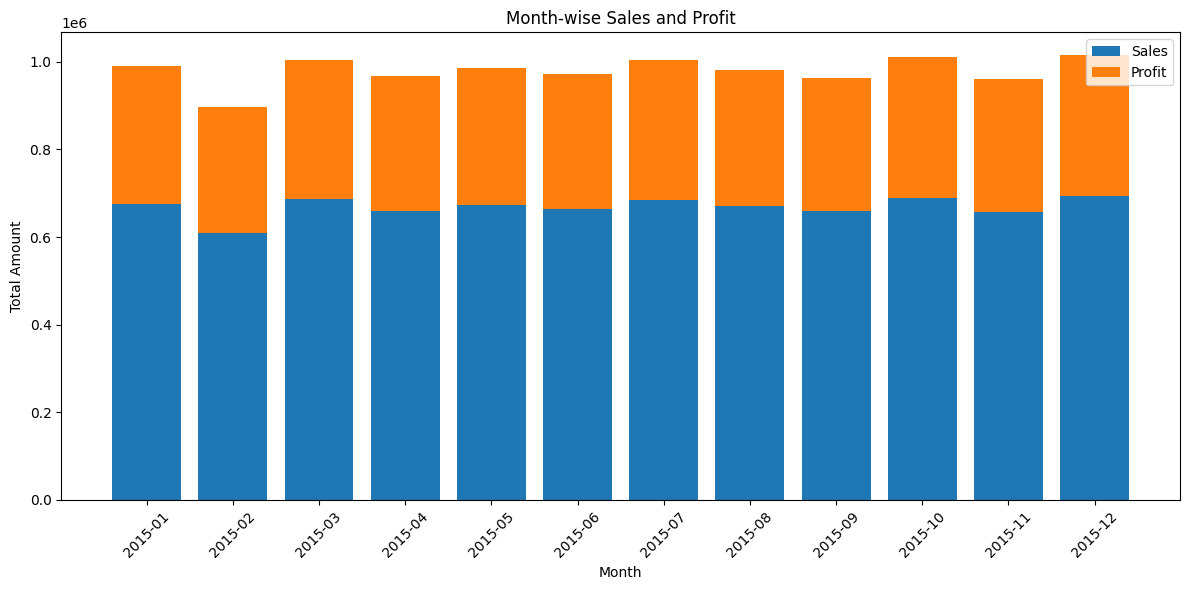

In [3]:
#Task 7
#Create Column Chart of a month-wise table and region-wise table
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = 'D:\\Python lms\\Python_Project\\Ecommerce_Dashboard.xlsx'
df = pd.read_excel(file_path)

# Ensure 'Order Date' is in datetime format and create a new column for the month
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.strftime('%Y-%m')

# Group by the 'Month' column and sum up the 'Sales' and 'Profit'
month_wise_data = df.groupby('Month').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Group by the 'Region' column and sum up the 'Sales'
region_wise_data = df.groupby('Region')['Sales'].sum().reset_index()

# Plotting month-wise Sales and Profit
plt.figure(figsize=(12, 6))
plt.bar(month_wise_data['Month'], month_wise_data['Sales'], label='Sales')
plt.bar(month_wise_data['Month'], month_wise_data['Profit'], bottom=month_wise_data['Sales'], label='Profit')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.title('Month-wise Sales and Profit')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


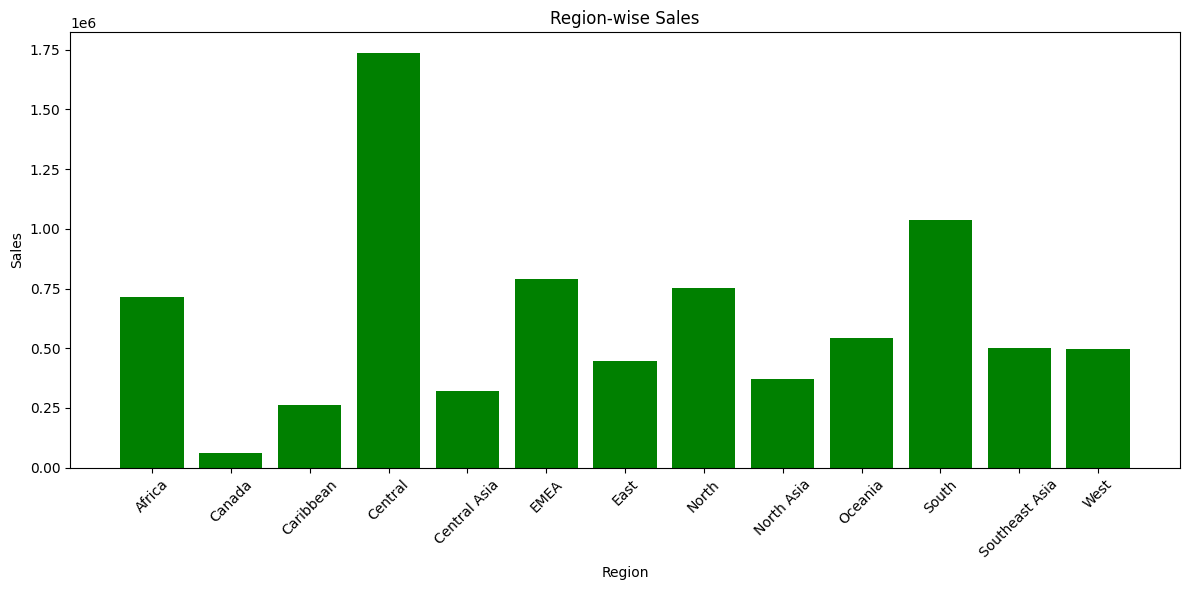

In [4]:
# Plotting region-wise Sales
plt.figure(figsize=(12, 6))
plt.bar(region_wise_data['Region'], region_wise_data['Sales'], color='green')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Region-wise Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import os
os.getcwd()
